## Data Analysis on Aviation

Gloria Pintado, Makonnen Sharpe 
Phase 1 DS Live

**Business Problem**

This company wants to start a new path of industry in their company and wants to start in the industry of 
airplanes. They want to know which aircraft have less risk of having accidents for them to buy it and start operating
airplanes.

The goal for this to be achieved is to gather important data about aviation in the past to be able to make recommendations about which aircraft is better and some other factors that make these airplanes have accidents.

In [7]:
# importing what we will need
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime
import warnings 

warnings.filterwarnings('ignore')

In [8]:
ls ../data

ls: ../data: No such file or directory


In [9]:
# loading dataset that we will be using 
df = pd.read_csv('./data/Aviation_Data.csv')

## Exloring Data

Exploring data to have a better look at what data we will be working with and see if data has missing values in order to do the next step, which is data cleaning the dataset.

In [10]:
# display the first 5 rows from the DataFrame
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [11]:
#to see how many rows and columns the DataFrame has.
df.shape

(90348, 31)

In [12]:
#prints information that the DataFrame contains such as numberof colummns, columns labels, column data types,
#such as numberof colummns, columns labels, column data types, memory usage, range index, and number of cells in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [13]:
# this is used to calculate some statiscical data on numerical values of Series or DataFrame
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [14]:
# This will returns the number which has Nan values in the DataFrame
df.isna().sum()/len(df) *100

Event.Id                   1.614867
Investigation.Type         0.000000
Accident.Number            1.614867
Event.Date                 1.614867
Location                   1.672422
Country                    1.865011
Latitude                  61.944924
Longitude                 61.954886
Airport.Code              44.512330
Airport.Name              41.665560
Injury.Severity            2.721698
Aircraft.damage            5.150086
Aircraft.Category         64.263736
Registration.Number        3.144508
Make                       1.684597
Model                      1.716695
Amateur.Built              1.727764
Number.of.Engines          8.348829
Engine.Type                9.468942
FAR.Description           64.555939
Schedule                  86.073848
Purpose.of.flight          8.468367
Air.carrier               81.573471
Total.Fatal.Injuries      14.233851
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Uninjured            8.158454
Weather.Condition          6

In [15]:
# will give you all the columns labels the DataFrame has
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

**Some things we have notice :**
- We will be working we many columns however some columns has many missing values
- Need to convert Date to datetime
- Created a few new columns

## Data Cleaning 

From describing the data, we can see that there will be a lot of null values in each category. I will not be dropping
columns because I think we will lose a lot of information. I will be turning some category values into unknown values and some
other important categories, I will be filling them using the mode.

In [16]:
# here we will be filling up the Nan values into unknown values
df['Event.Id'].fillna('Unknown', inplace=True)
df['Accident.Number'].fillna('Unknown', inplace=True)
df['Location'].fillna('Unknown', inplace=True)
df['Airport.Code'].fillna('Unknown', inplace=True)
df['Airport.Name'].fillna('Unknown', inplace=True)
df['Aircraft.damage'].fillna('Unknown', inplace=True)
df['Aircraft.Category'].fillna('Unknown', inplace=True)
df['Make'].fillna('Unknown', inplace=True)
df['Model'].fillna('Unknown', inplace=True)
df['Amateur.Built'].fillna('Unknown', inplace=True)
df['FAR.Description'].fillna('Unknown', inplace=True)
df['Schedule'].fillna('Unknown', inplace=True)
df['Air.carrier'].fillna('Unknown', inplace=True)
df['Air.carrier'].fillna('Unknown', inplace=True)
df['Registration.Number'].fillna('Unknown', inplace=True)
df['Latitude'].fillna('Unknown', inplace=True)
df['Longitude'].fillna('Unknown', inplace=True)
df['Weather.Condition'].fillna('Unknown', inplace=True)
df['Injury.Severity'].fillna('Unknown', inplace=True)


In [17]:
# here we are using the mode since in category of number of engines there is a lot of airplanes having 1 engine
number_engines_mode = df['Number.of.Engines'].mode()
df['Number.of.Engines'].fillna(value = number_engines_mode, inplace = True)

In [18]:
# converting date to datetime 
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [19]:
# create new columns and remove data before 1985 since I think is irrevalent
df['Year'] = df['Event.Date'].dt.year
df['Month.Abbr'] = df['Event.Date'].dt.month_name().str[:3]
df['Day.Abbr'] = df['Event.Date'].dt.day_name().str[:3]
df = df[df['Year'] >= 1985]

In [20]:
#see the change we have made about
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month.Abbr,Day.Abbr
10613,20001214X35598,Accident,NYC85FNC02,1985-01-01,"HOPKINTON, NH",United States,Unknown,Unknown,LEB,"LEBANON, NH",...,2.0,0.0,0.0,IMC,Approach,Probable Cause,NaN,1985.0,Jan,Tue
10614,20001214X35495,Accident,DEN85FA055,1985-01-01,"EDGEWOOD, NM",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,0.0,0.0,IMC,Cruise,Probable Cause,NaN,1985.0,Jan,Tue
10615,20001214X35494,Accident,DCA85RA007,1985-01-01,"LA PAZ, Bolivia",Bolivia,Unknown,Unknown,LPB,LA PAZ INTERNATIONAL,...,0.0,0.0,0.0,UNK,NaN,Foreign,06-02-1995,1985.0,Jan,Tue
10616,20001214X35566,Accident,MIA85FA071,1985-01-01,"ODESSA, FL",United States,Unknown,Unknown,Unknown,Unknown,...,2.0,2.0,0.0,VMC,Maneuvering,Probable Cause,NaN,1985.0,Jan,Tue
10617,20001214X35463,Accident,ATL85LA075,1985-01-01,"DUBLIN, NC",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,0.0,1.0,VMC,Cruise,Probable Cause,NaN,1985.0,Jan,Tue


In [21]:
# just to see an update of what categories has some missing values now and start doing our analysis
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                     180
Latitude                      0
Longitude                     0
Airport.Code                  0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category             0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          5977
Engine.Type                7094
FAR.Description               0
Schedule                      0
Purpose.of.flight          6181
Air.carrier                   0
Total.Fatal.Injuries      11349
Total.Serious.Injuries    12447
Total.Minor.Injuries      11867
Total.Uninjured            5886
Weather.Condition             0
Broad.phase.of.flight     27153
Report.Status              6384
Publication.Date           8265
Year    

## Data Analysis 

Date vs. Accidents vs. Weather is what I will mainly focus on!


Analyze when accidents happen mostly and why may be the cause of them.

The date can also give powerful information about why there are the most accidents at those times of the year, if there are any.




In [22]:
# Get the number of accidents that have happened each year.
accidents_per_year = df.groupby(['Year'], as_index = False)['Event.Id'].count()
# Just get the first five rows 
accidents_per_year

,Year,Event.Id
0,1985.0,3096
1,1986.0,2880
2,1987.0,2828
3,1988.0,2730
4,1989.0,2544
5,1990.0,2518
6,1991.0,2462
7,1992.0,2355
8,1993.0,2313
9,1994.0,2257


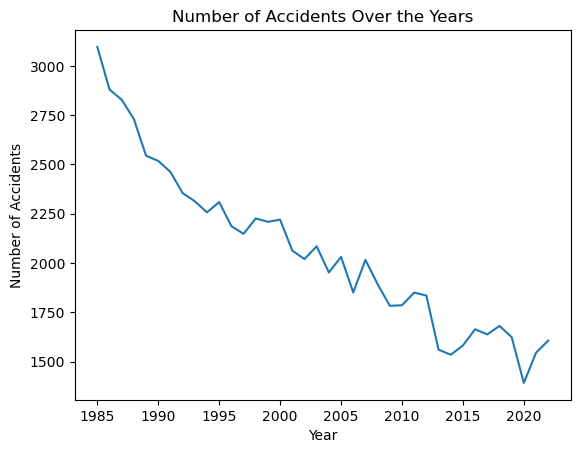

In [23]:
# Make a line graph of accidents that happen each year.
accidents_per_year = df['Year'].value_counts().sort_index()
plt.plot(accidents_per_year.index, accidents_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Over the Years')
plt.grid(False)
plt.show()

The following can be observed:
 - Accidents have been decreasing through the years.
 - Cleaned data shows information from the year 1985 to 2022.

In [24]:
# We will be grouping accidents that have happened in each month of every year.
accidents_per_month = df.groupby(['Month.Abbr'], as_index = False)['Event.Id'].count()
accidents_per_month

,Month.Abbr,Event.Id
0,Apr,6416
1,Aug,8772
2,Dec,4426
3,Feb,4601
4,Jan,4390
5,Jul,9466
6,Jun,8428
7,Mar,5881
8,May,7457
9,Nov,4862


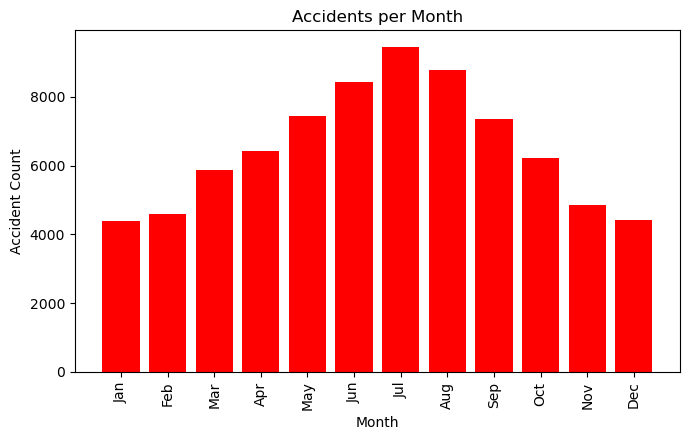

In [25]:
# Sorting the data by month order
sorted_data = accidents_per_month.sort_values(by='Month.Abbr', key=lambda x: [list(calendar.month_abbr).index(month) for month in x])

# Creating the bar graph
plt.figure(figsize=(7, 4.5))
plt.bar(sorted_data['Month.Abbr'], sorted_data['Event.Id'], color='red')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.title('Accidents per Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(False)

# Display the graph
plt.show()


- Most accidents has happened in the months of June, July and August.
- Summer time and most of the population is on vacation in the United States.
- Maybe there are too many flights? Maybe it's the weather conditions? We'll find out!


In [26]:
# See the monthly flight count that each year had in order to know why there were too many accidents in July, June, and August.
monthly_flights = df.groupby(['Year','Month.Abbr'])['Event.Id'].nunique()
print(monthly_flights)

Year    Month.Abbr
1985.0  Apr           273
        Aug           339
        Dec           172
        Feb           188
        Jan           171
                     ... 
2022.0  Mar           128
        May           134
        Nov            93
        Oct           136
        Sep           154
Name: Event.Id, Length: 456, dtype: int64


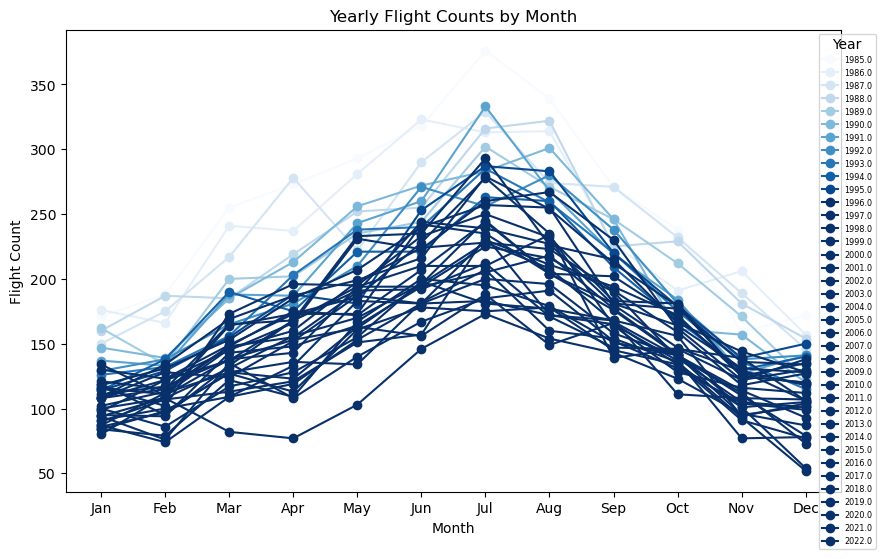

In [27]:
# Convert the multi-index Series to a DataFrame
monthly_flights_df = monthly_flights.unstack()

# Reorder months for proper chronological order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_flights_df = monthly_flights_df.reindex(columns=month_order)

# Transpose the DataFrame to have years as rows and months as columns
transposed_df = monthly_flights_df.T

# Create a line graph where each line represents a year
plt.figure(figsize=(10, 6))

color_map = plt.cm.get_cmap('Blues', len(transposed_df))

for idx, year in enumerate(transposed_df.columns):
    plt.plot(transposed_df.index, transposed_df[year], marker='o', label=year, color=color_map(idx))

plt.title('Yearly Flight Counts by Month')
plt.xlabel('Month')
plt.ylabel('Flight Count')
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.05, 1), fontsize='xx-small')
plt.grid(False)
plt.show()


The following observations can be made:
 - There has been a pattern for a long time where June, July, and August have more accidents than other months.
 - There is a season where most of these accidents happen.

In [28]:
 df['Weather.Condition'].value_counts()

Weather.Condition
VMC        67797
IMC         5044
Unknown     4491
UNK          682
Unk          262
Name: count, dtype: int64

In [29]:
injury_data = df[df['Injury.Severity'] != 'Unavailable']

In [30]:
df['Injury.Severity'] = df['Injury.Severity'].str.split('(').str[0]
df['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal      59083
Fatal          15876
Incident        1830
Unknown         1000
Minor            218
Serious          173
Unavailable       96
Name: count, dtype: int64

In [31]:
# Filter data for IMC and VMC accidents
imc_accidents = df[df['Weather.Condition'] == 'IMC']
vmc_accidents = df[df['Weather.Condition'] == 'VMC']

In [32]:
# Count non-fatal and fatal accidents for IMC
imc_non_fatal = imc_accidents[imc_accidents['Injury.Severity'] == 'Non-Fatal']
imc_fatal = imc_accidents[imc_accidents['Injury.Severity'] == 'Fatal']

# Count non-fatal and fatal accidents for VMC
vmc_non_fatal = vmc_accidents[vmc_accidents['Injury.Severity'] == 'Non-Fatal']
vmc_fatal = vmc_accidents[vmc_accidents['Injury.Severity'] == 'Fatal']

# Get the counts
num_imc_non_fatal = len(imc_non_fatal)
num_imc_fatal = len(imc_fatal)
num_vmc_non_fatal = len(vmc_non_fatal)
num_vmc_fatal = len(vmc_fatal)

print("Number of non-fatal accidents under IMC:", num_imc_non_fatal)
print("Number of fatal accidents under IMC:", num_imc_fatal)
print("Number of non-fatal accidents under VMC:", num_vmc_non_fatal)
print("Number of fatal accidents under VMC:", num_vmc_fatal)


Number of non-fatal accidents under IMC: 1879
Number of fatal accidents under IMC: 2979
Number of non-fatal accidents under VMC: 55107
Number of fatal accidents under VMC: 10896


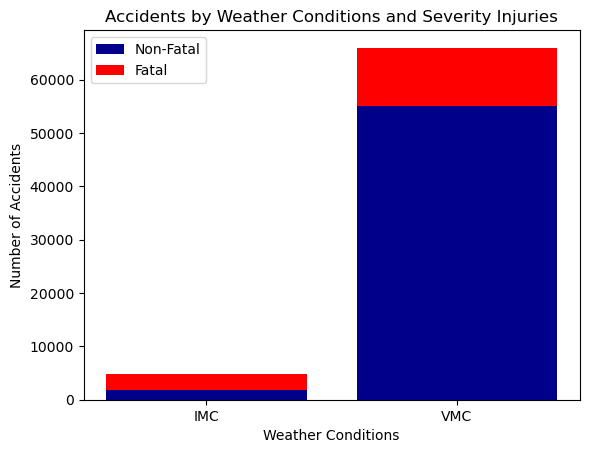

In [33]:
# Count non-fatal and fatal accidents for IMC
imc_non_fatal = len(imc_accidents[imc_accidents['Injury.Severity'] == 'Non-Fatal'])
imc_fatal = len(imc_accidents[imc_accidents['Injury.Severity'] == 'Fatal'])

# Count non-fatal and fatal accidents for VMC
vmc_non_fatal = len(vmc_accidents[vmc_accidents['Injury.Severity'] == 'Non-Fatal'])
vmc_fatal = len(vmc_accidents[vmc_accidents['Injury.Severity'] == 'Fatal'])

# Create a stacked bar plot
labels = ['IMC', 'VMC']
non_fatal_values = [imc_non_fatal, vmc_non_fatal]
fatal_values = [imc_fatal, vmc_fatal]

plt.bar(labels, non_fatal_values, label='Non-Fatal', color='darkblue')
plt.bar(labels, fatal_values, bottom=non_fatal_values, label='Fatal', color='red')

plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Weather Conditions and Severity Injuries')
plt.legend()
plt.show()


In [34]:
df.to_csv('clean_Aviation_Data.csv')

In [37]:
#Importing libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')

In [38]:
 ls ../data

ls: ../data: No such file or directory


# The data in its first state

In [40]:
df= pd.read_csv('./data/Aviation_Data.csv')

In [41]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [42]:
#loooking to get an understating of all my subcategories
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [43]:
#looking to see what is the vital importance to my data set
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [44]:
df['Broad.phase.of.flight'].value_counts()

Broad.phase.of.flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

In [45]:
df.keys()

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [46]:
#Looking to find any null values 
df.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

# Starting to clean data

In [47]:
df['Make'].value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

In [48]:
df['Number.of.Engines'].fillna(1, inplace=True)
df['Number.of.Engines'].replace(0, 1, inplace=True)


In [49]:
df['Make'] = df['Make'].str.lower()

# Group by lowercase "Make" values and get the first original case-insensitive "Make" value
combined_makes = df.groupby('Make')['Make'].transform('first')

# Update the "Make" column with the combined lowercase "Make" values
df['Make'] = combined_makes

# Drop duplicate rows based on both lowercase "Make" and other columns
df.drop_duplicates(subset=['Make', 'Model', 'Number.of.Engines'], inplace=True)

# Reset index after modification
df.reset_index(drop=True, inplace=True)

# Print the modified DataFrame
print(df)

             Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
19070  20221206106422           Accident      CEN23LA061  2022-12-05   
19071  20221212106439           Accident      DCA23LA093  2022-12-08   
19072  20221213106456           Accident      WPR23LA066  2022-12-12   
19073  20221227106496           Accident      WPR23LA074  2022-12-17   
19074  20221219106472           Accident      DCA23LA096  2022-12-18   

              Location        Country   Latitude  Longitude Airport.Code  \
0      MOOSE CREEK, ID  United States        NaN        NaN

In [50]:
df[df['Total.Fatal.Injuries']==0].head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982
11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,NaN,NaN,NaN,TUSKEGEE,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,01-01-1982


In [51]:
dataclean= df.dropna(subset = ['Event.Id'], inplace = True)

In [52]:
models_by_make = df.groupby('Make')['Model'].unique()

# Print the "Models" for each "Make"
for make, models in models_by_make.items():
    models_str = [str(model) for model in models]  # Convert models to strings


In [53]:
import datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Year'] = df['Event.Date'].dt.year
df['Month.Abbr'] = df['Event.Date'].dt.month_name().str[:3]
df['Day.Abbr'] = df['Event.Date'].dt.day_name().str[:3]
df = df[df['Year'] >= 1982]

In [54]:
df['Make'].value_counts().sort_values(ascending=False).head(20)

Make
cessna               899
piper                723
boeing               651
beech                604
bell                 306
mcdonnell douglas    165
schweizer            146
aerospatiale         142
de havilland         121
north american       116
douglas              115
grumman              112
maule                112
embraer              109
sikorsky             108
aero commander       101
airbus                92
aeronca               89
airbus industrie      88
bellanca              84
Name: count, dtype: int64

In [55]:
co=df['Country'].value_counts().sort_values(ascending=False).head(10)
co

Country
United States     17346
United Kingdom      112
Brazil               96
Canada               93
France               75
Australia            72
Mexico               71
Germany              70
Colombia             55
Spain                53
Name: count, dtype: int64

In [56]:
df['Country']= df['Country'].fillna('United States')

# Graphing data 

[Text(0, 0.5, 'Accident Count 1940 - 2020')]

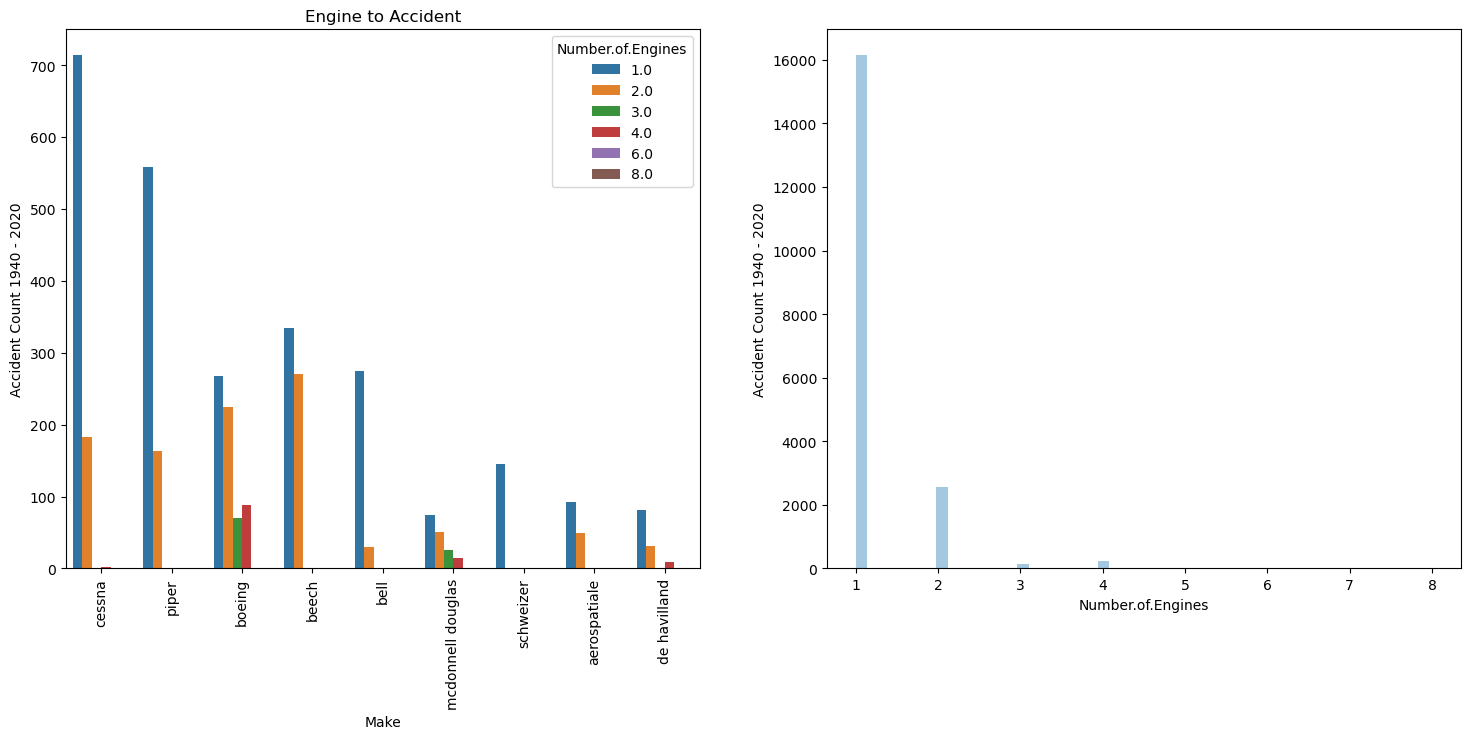

In [57]:
fig = plt.figure(figsize = (18,7))

fig.add_subplot(1,2,1)
sns.countplot(x = 'Make', 
              data  =  df.dropna(subset = ['Number.of.Engines']), 
              hue = 'Number.of.Engines',
              order = df['Make'].value_counts()[0:9].index)
plt.xticks(rotation  =  90)
plt.xlabel('Make')
plt.ylabel("Accident Count 1940 - 2020")
plt.title("Engine to Accident")

fig.add_subplot(1,2,2)
sns.distplot(a = df['Number.of.Engines'].dropna(), kde=False).set(ylabel = "Accident Count 1940 - 2020")

In [58]:
histo_features = ['Injury.Severity','Aircraft.damage','Aircraft.Category', 'Make','Amateur.Built','Number.of.Engines','Engine.Type',
            'FAR.Description','Purpose.of.flight','Weather.Condition','Broad.phase.of.flight']
histo_obj =[x  for x in histo_features if df[x].dtypes == 'object']
histo_num =[x  for x in histo_features if df[x].dtypes != 'object']

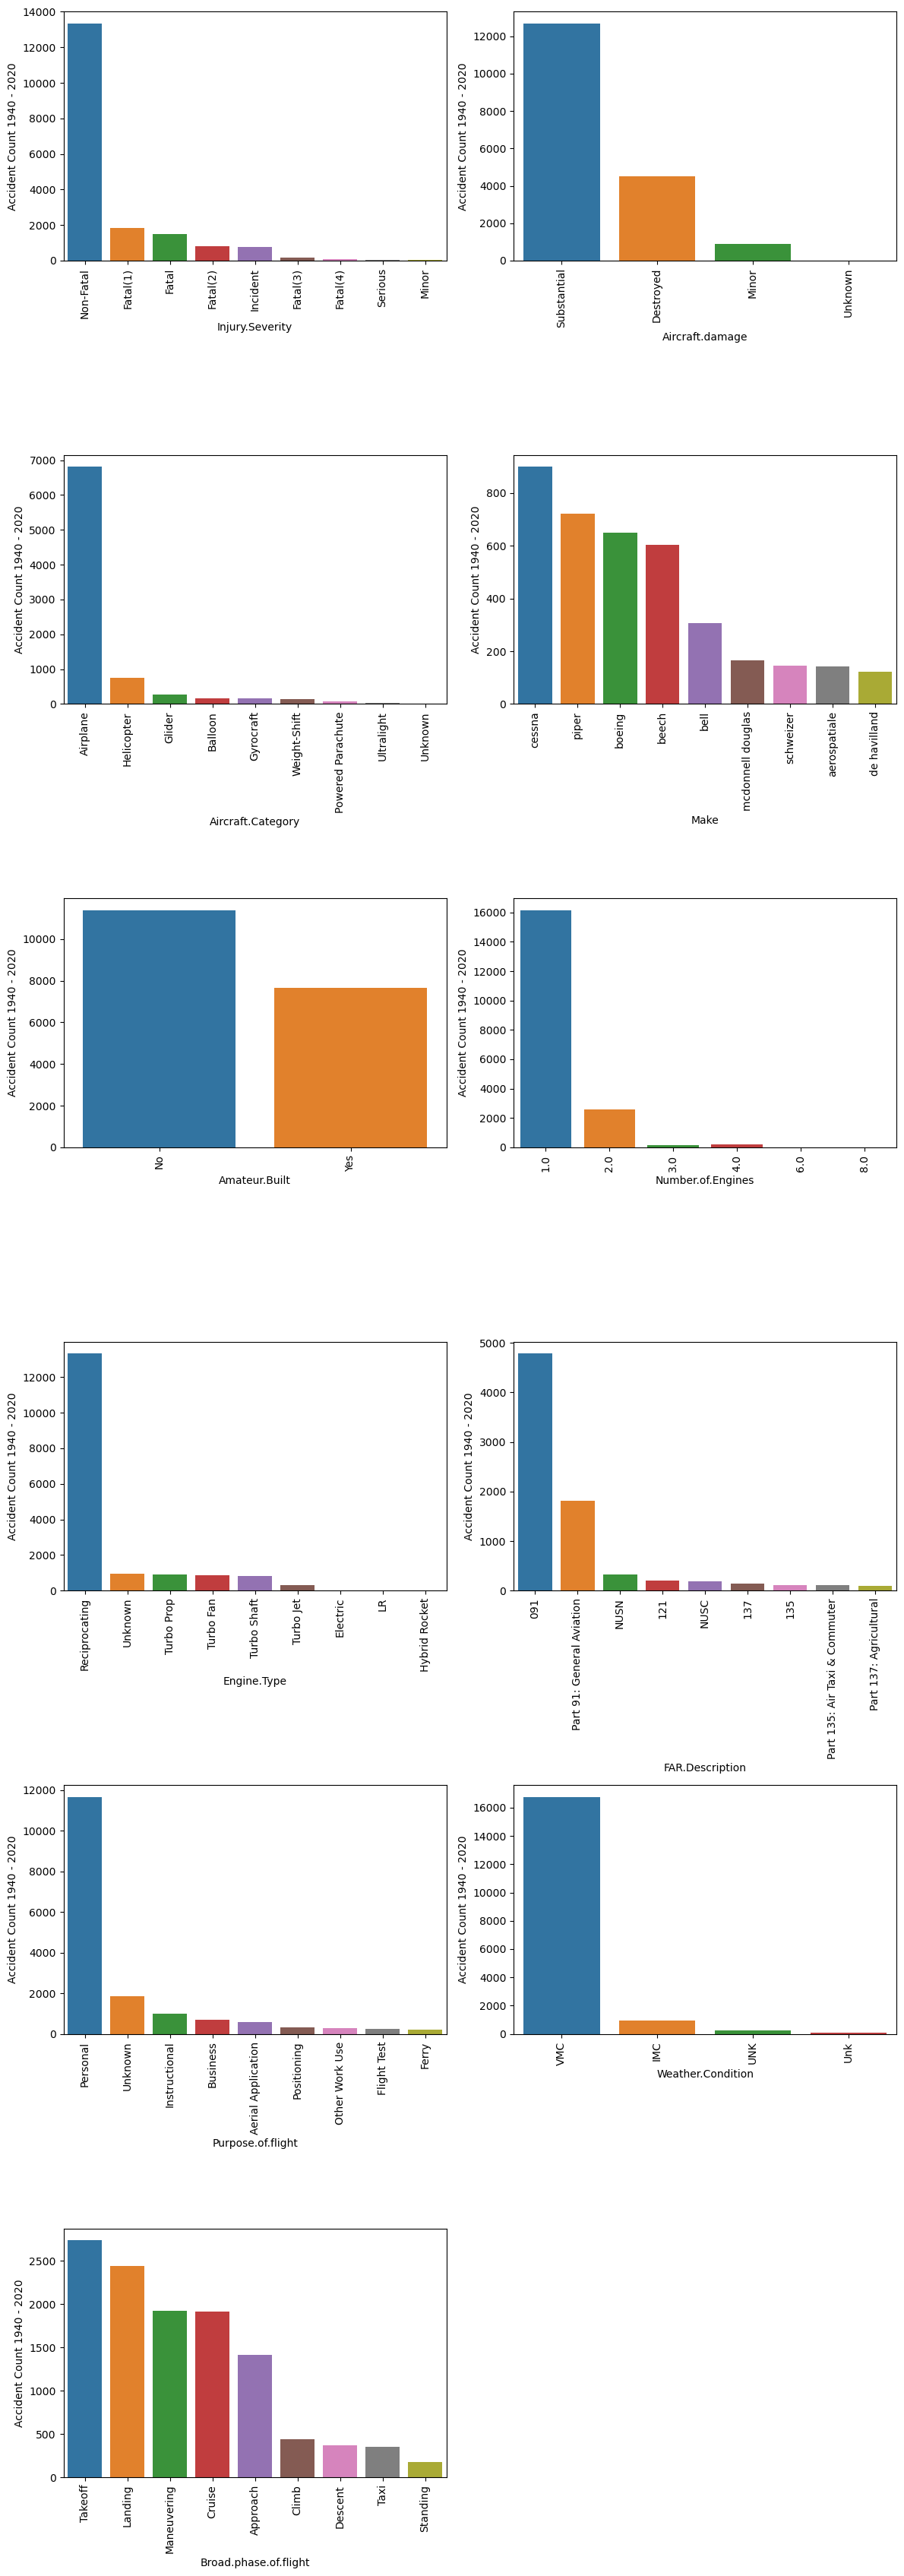

In [59]:
fig  = plt.figure(figsize = (12,34))
for x in  histo_features:
    fig.add_subplot(6,2, histo_features.index(x)+1)
    if len(df[x].value_counts()) >10:
        sns.countplot(x = df[x].dropna(), 
                      data  =  df, 
                      order = df[x].value_counts()[0:9].index).set(xlabel= x, 
                                                                     ylabel = "Accident Count 1940 - 2020")
        plt.xticks(rotation=90)
    else:
        sns.countplot(x = df[x].dropna(), 
                      data  =  df).set(xlabel= x, 
                                         ylabel = "Accident Count 1940 - 2020")
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

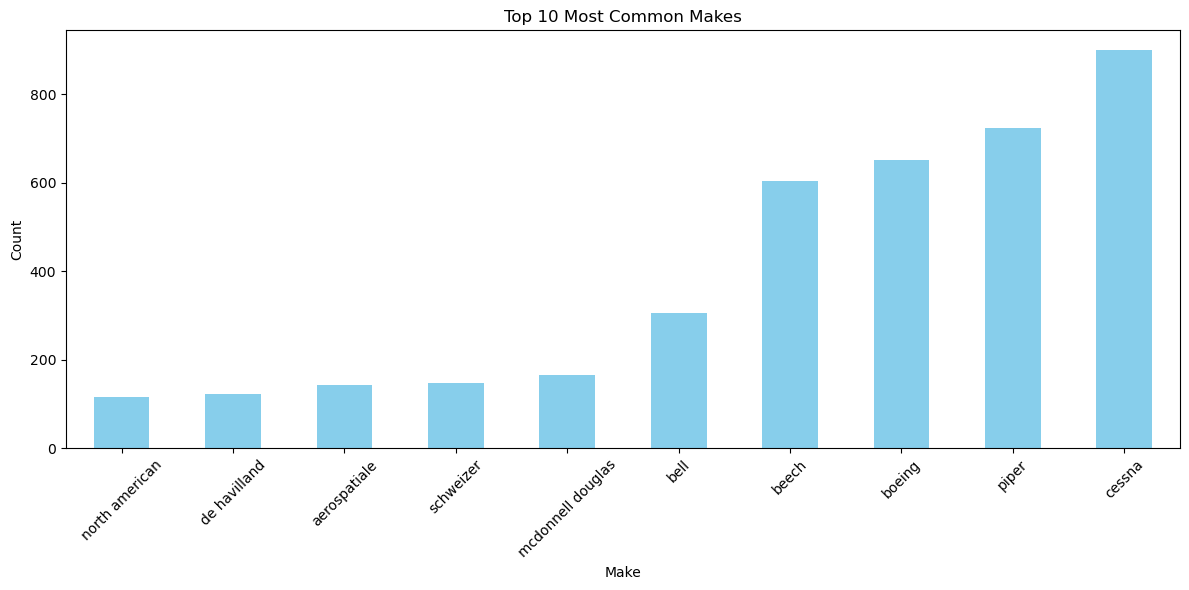

In [60]:
filtered_df = df.dropna(subset=['Make'])

# Get the ten most common makes
top_makes = filtered_df['Make'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_makes.sort_values().plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

  In the data provided above I have conclude that the best airplanes to buy are those with mulitple enginers. The planes with more engines are safer  

# Which aircrafts have more engines? 

In [61]:
# Group the data by "Make" and calculate the average "Number.of.Engines"
average_engines_by_make = df.groupby('Make')['Number.of.Engines'].mean()
average_engines_by_make

Make
107.5 flying corporation    1.0
1200                        1.0
177mf llc                   1.0
1977 colfer-chan            1.0
1st ftr gp                  1.0
                           ... 
zubair s khan               1.0
zuber thomas p              1.0
zukowski                    1.0
zwart                       1.0
zwicker murray r            1.0
Name: Number.of.Engines, Length: 7587, dtype: float64

In [62]:
average_engines_by_model = df.groupby('Model')['Number.of.Engines'].mean()
average_engines_by_model

Model
&GCBC                 1.0
(EX) RV-6             1.0
(MODIFIED)            1.0
(SOLOY CONVERSION)    1.0
-269C                 1.0
                     ... 
lebed                 1.0
none                  1.0
sportstar             1.0
unk                   1.0
unknown               1.0
Name: Number.of.Engines, Length: 12316, dtype: float64

In [63]:
max_average_engines = average_engines_by_make.max()
max_average_engines

8.0

In [64]:
# Group the data by "Make" and count the occurrences
make_counts = df['Make'].value_counts()

# Filter the makes with 5 or more occurrences
makes_greater_than_equal_to_5 = make_counts[make_counts >= 5]

print("Makes with 5 or more occurrences:")
print(makes_greater_than_equal_to_5)

Makes with 5 or more occurrences:
Make
cessna                    899
piper                     723
boeing                    651
beech                     604
bell                      306
                         ... 
schreder                    5
canadian car & foundry      5
nihon                       5
morgan                      5
howard aircraft corp.       5
Name: count, Length: 435, dtype: int64


In [65]:
filtered_df = df[df['Number.of.Engines'] >= 5]

In [66]:
unique_makes = filtered_df['Make'].unique()

In [67]:
# Filter the DataFrame based on the condition
filtered_df = df[df['Number.of.Engines'] >= 5]

# Get unique makes from the filtered DataFrame
unique_makes = filtered_df['Make'].unique()

print("Makes with Number.of.Engines equal to or greater than 5:")
print(unique_makes)

Makes with Number.of.Engines equal to or greater than 5:
['kitty hawk' 'cameron' 'lindstrand' 'joby aero inc']


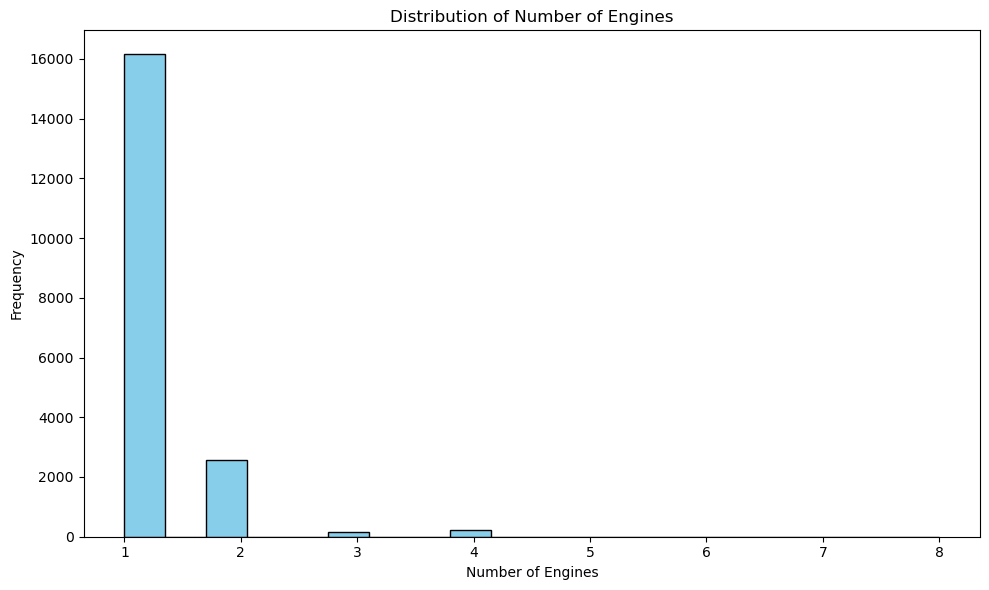

In [68]:
# Create a histogram using matplotlib
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(df['Number.of.Engines'], bins=20, color='skyblue', edgecolor='black')

plt.title('Distribution of Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [69]:
x = df['Make'].value_counts().sort_index().index
y = df['Number.of.Engines'].value_counts().sort_index().values

In [70]:
# Filter out rows with null values in both "Make" and "Model" columns
filtered_df = df.dropna(subset=['Make', 'Model'])

# Find unique models for Boeing
BOEING_models = filtered_df[filtered_df['Make'] == 'Boeing']['Model'].unique()



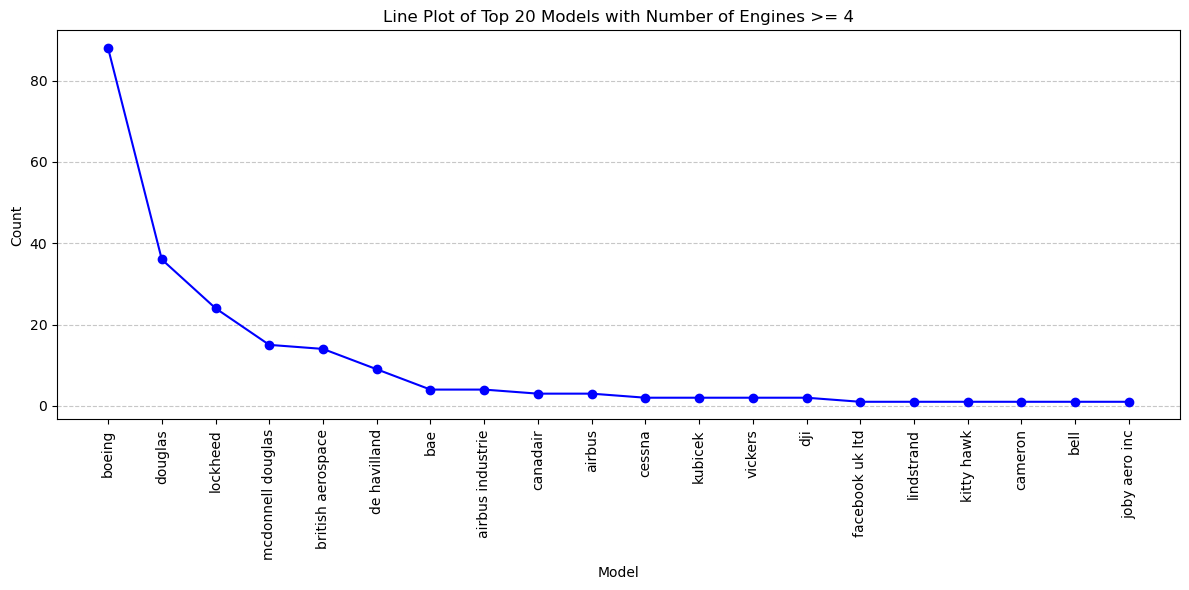

In [71]:
filtered_df = df[df['Number.of.Engines'] >= 4]

# Get the 20 most common models
top_20_models = filtered_df['Make'].value_counts().head(20)

# Create a line plot using matplotlib
plt.figure(figsize=(12, 6))

plt.plot(top_20_models.index, top_20_models.values, marker='o', linestyle='-', color='b')

plt.title('Line Plot of Top 20 Models with Number of Engines >= 4')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [72]:
repetitive_makes = df['Make'][df['Make'].duplicated()].unique()

# Print the repetitive "Make" values
print("Repetitive Makes:")
print(repetitive_makes)

Repetitive Makes:
['cessna' 'beech' 'piper' ... 'hagerty' 'airborne windsports'
 'rotorsport uk ltd']


In [73]:
repetitive_makes = df['Make'][df['Make'].duplicated()].unique()

# Combine repetitive "Make" values into a single consistent value
consistent_make = 'Combined Make'  # Replace with the desired consistent value

# Replace repetitive "Make" values with the consistent value
df['Make'].replace(repetitive_makes, consistent_make, inplace=True)

# Print the modified DataFrame
print(df)

             Event.Id Investigation.Type Accident.Number Event.Date  \
7      20020909X01562           Accident      SEA82DA022 1982-01-01   
8      20020909X01561           Accident      NYC82DA015 1982-01-01   
9      20020909X01560           Accident      MIA82DA029 1982-01-01   
10     20020909X01559           Accident      FTW82DA034 1982-01-01   
11     20020909X01558           Accident      ATL82DKJ10 1982-01-01   
...               ...                ...             ...        ...   
19070  20221206106422           Accident      CEN23LA061 2022-12-05   
19071  20221212106439           Accident      DCA23LA093 2022-12-08   
19072  20221213106456           Accident      WPR23LA066 2022-12-12   
19073  20221227106496           Accident      WPR23LA074 2022-12-17   
19074  20221219106472           Accident      DCA23LA096 2022-12-18   

               Location        Country Latitude Longitude Airport.Code  \
7           PULLMAN, WA  United States      NaN       NaN          NaN   

In [74]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Extract year from 'Event.Date'
df['Year'] = df['Event.Date'].dt.year

# Filter the DataFrame to include only rows with 'Year' greater than or equal to 2015
df = df[df['Year'] >= 2015]

# Filter out rows with null values in both "Make" and "Model" columns
filtered_df = df.dropna(subset=['Make', 'Model'])

# Group by "Make" and count unique "Model" values
make_engine_counts = filtered_df.groupby('Make')['Model'].nunique()

# Filter makes with 4 or more engines
makes_with_4_or_more_engines = make_engine_counts[make_engine_counts >= 4]

print(makes_with_4_or_more_engines)



Make
Combined Make    1426
Name: Model, dtype: int64


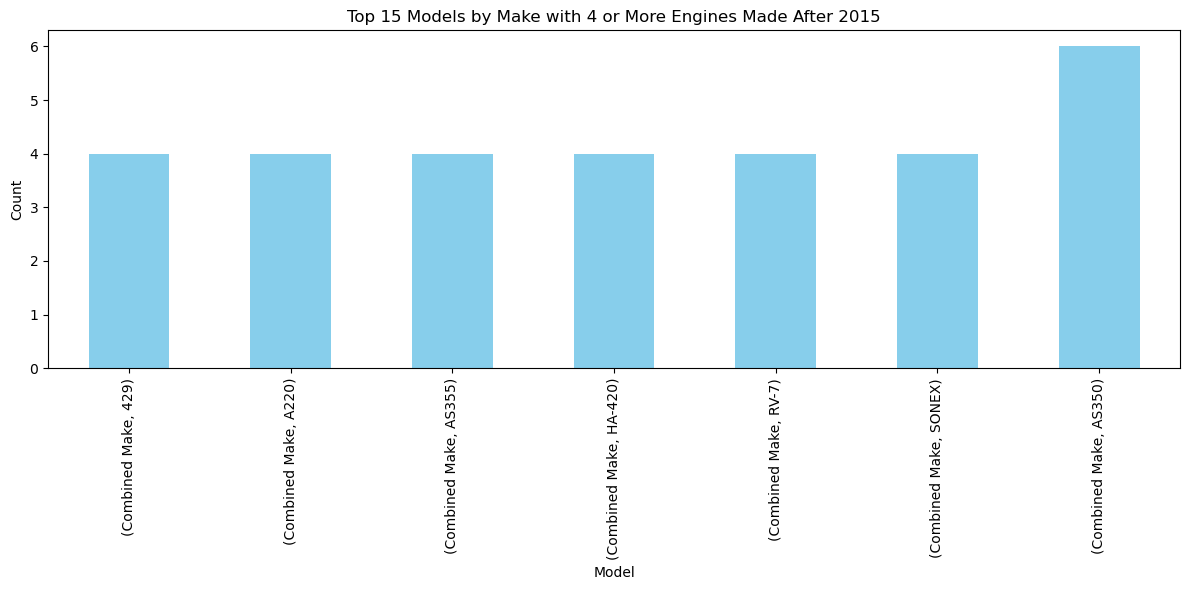

In [75]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Extract year from 'Event.Date'
df['Year'] = df['Event.Date'].dt.year

# Filter the DataFrame to include only rows with 'Year' greater than or equal to 2015
df = df[df['Year'] >= 2015]

# Filter out rows with null values in both "Make" and "Model" columns
filtered_df = df.dropna(subset=['Make', 'Model'])

# Group by "Make" and "Model" and count occurrences
make_model_engine_counts = filtered_df.groupby(['Make', 'Model'])['Model'].count()

# Filter models with 4 or more engines
models_with_4_plus_engines = make_model_engine_counts[make_model_engine_counts >= 4]

# Get the top 15 models by make
top_models_by_make = models_with_4_plus_engines.groupby('Make').nlargest(15).reset_index(level=0, drop=True)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_models_by_make.sort_values().plot(kind='bar', color='skyblue')
plt.title('Top 15 Models by Make with 4 or More Engines Made After 2015')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

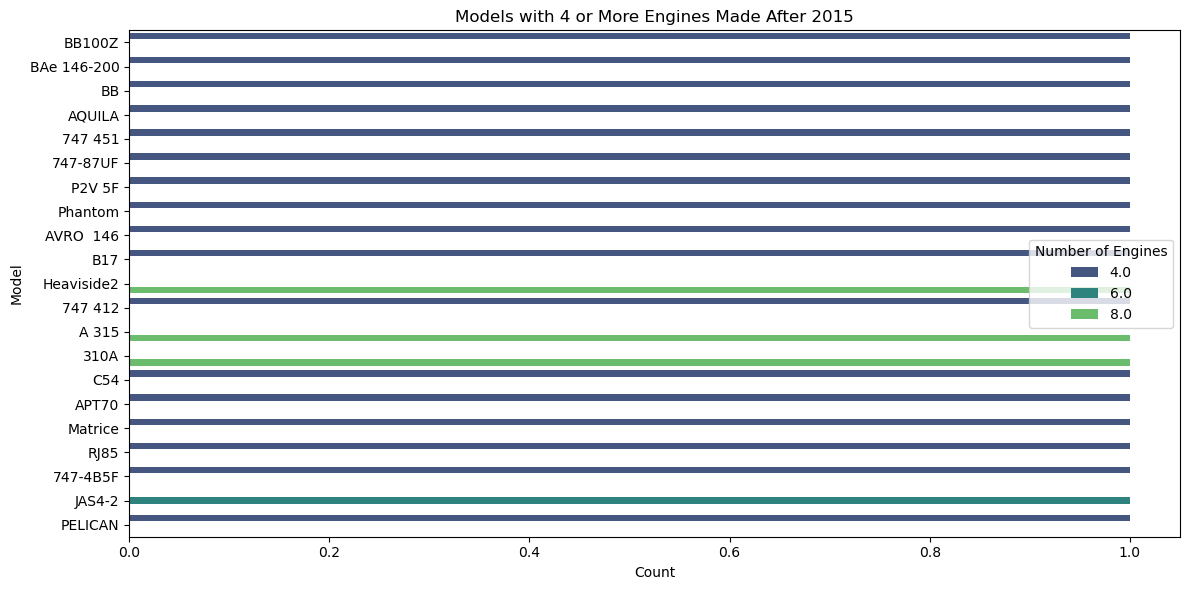

In [76]:

df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Extract year from 'Event.Date'
df['Year'] = df['Event.Date'].dt.year

# Filter the DataFrame to include only rows with 'Year' greater than or equal to 2015
df = df[df['Year'] >= 2015]

# Filter models with 4 or more engines
models_4_plus_engines = df[df['Number.of.Engines'] >= 4]

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=models_4_plus_engines, y='Model', hue='Number.of.Engines', palette='viridis')

plt.title('Models with 4 or More Engines Made After 2015')
plt.xlabel('Count')
plt.ylabel('Model')
plt.legend(title='Number of Engines')

plt.tight_layout()
plt.show()


In the graph above, the count on the x-axis represents the number of occurrences of each model with 4 or more engines. Each bar corresponds to a specific model, and the height of the bar indicates how many times that particular model appears in the dataset with 4 or more engines. The hue color distinction indicates the number of engines for each model.

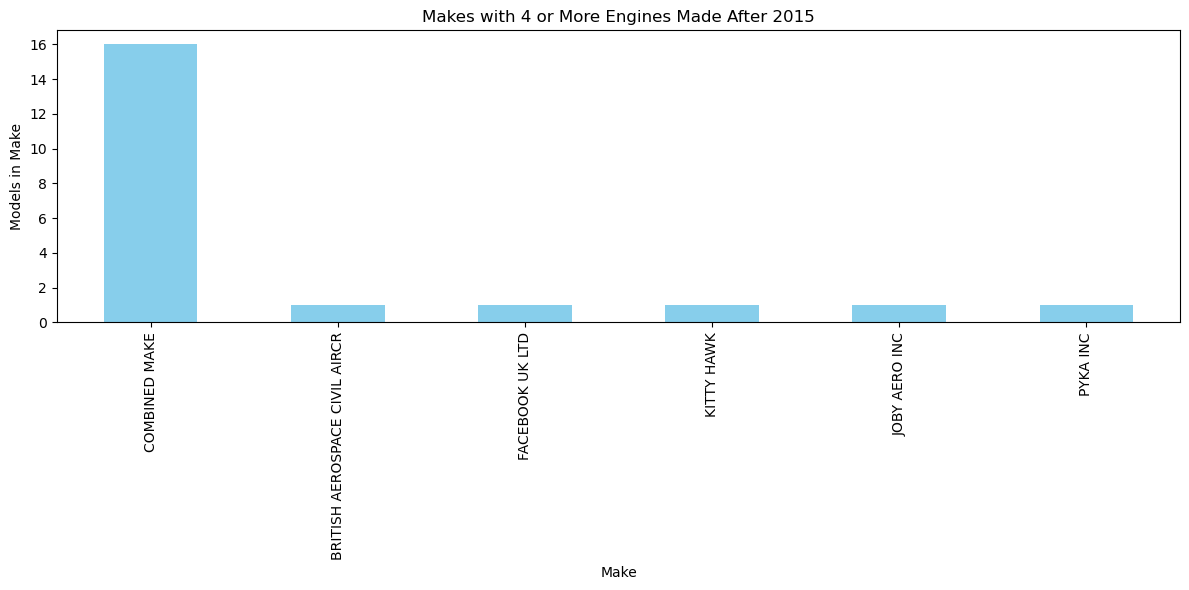

In [77]:

# Convert makes to uppercase for consistency
df['Make'] = df['Make'].str.upper()

# Convert 'Event.Date' to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Extract year from 'Event.Date'
df['Year'] = df['Event.Date'].dt.year

# Filter the DataFrame to include only rows with 'Year' greater than or equal to 2015
df = df[df['Year'] >= 2015]

# Filter makes with 4 or more engines
makes_4_plus_engines = df[df['Number.of.Engines'] >= 4]

# Count the occurrences of each make
make_counts = makes_4_plus_engines['Make'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
make_counts.plot(kind='bar', color='skyblue')
plt.title('Makes with 4 or More Engines Made After 2015')
plt.xlabel('Make')
plt.ylabel('Models in Make')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


## Recommendations

- Based on the research we've done we recommend the 747, the Heaviside2, B17
- Makes with more engines are the best and safest to buy.
- Having less transit of airplanes  in June, July and August can reduced accidents that were usually happening at this time of the year.
- Planes built in recent years are safer. 



## Next Steps

- Find out where can we get more planes 4 or more engines
- Gather more data on our recommendation as time goes by
- Find out if our planes are commercial or private.
